# LOKO LOÏC 15607684 Framework Logiciel pour Big Data (Semestre 1)

# Importation des librairies

Nous commençons premièrement à importer les différenters librairies nécessaires pour le travail, notamment pandas, numpy, matplot etc.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from scipy.stats import pearsonr
%matplotlib inline

# Lecture du fichier

Ensuite nous lisons nos données par le biais de la fonction pd.read_csv, ensuite nous jettons un oeil dans nos données

In [5]:
df=pd.read_csv('top2018.csv')

In [8]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


# Traitement des données

Nous allons maintenant voir ce qui nos ces top sons si populaires.
Ci-dessous une carte de chaleur qui montre les corrélatiions entre certaines colonnes, et cela grâce à la fonction de pandas corr().

In [9]:
df['Duration_min']=df['duration_ms']/60000

In [ ]:
df.drop(columns='duration_ms',inplace=True)

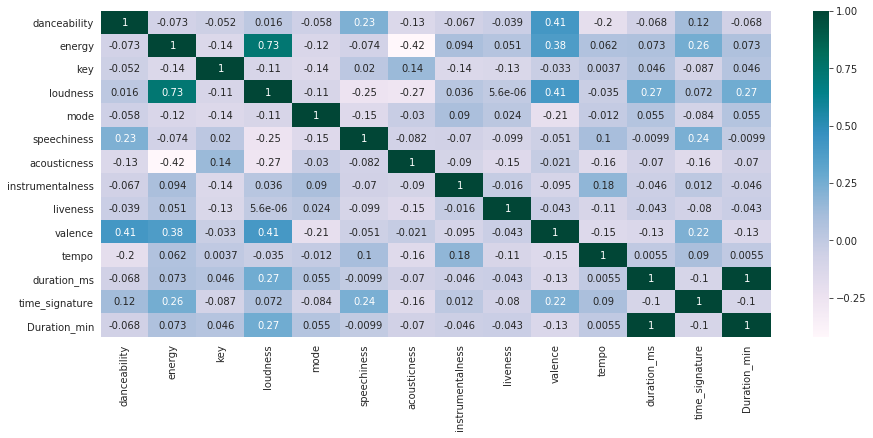

In [53]:
Correlation= df.drop(['id','name','artists'], axis=1)
plt.figure(figsize = (15,6))
sns.heatmap(Correlation.corr(),annot=True,cmap="PuBuGn")

Nous pouvons observer dans les tons les plus forts les corrélations existantes entre les différentes colonnes, à première vue les colonnes loudness et énergy, ensuite entre valence et danceability, nous allons analyser les forces de ces variables.
Remémorons nous le top 15 des artistes.

### top 15 des artistes

In [94]:
df['artists'].value_counts().head(15)

Post Malone        6
XXXTENTACION       6
Drake              4
Marshmello         3
Ed Sheeran         3
Selena Gomez       2
Imagine Dragons    2
Clean Bandit       2
Migos              2
Camila Cabello     2
Name: artists, dtype: int64


## Analyse de la dansabilité

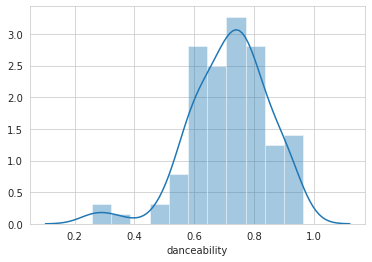

In [26]:
sns.set_style(style='whitegrid')
sns.distplot(df['danceability'])

Nous avons donc une dansabilité moyenne de: 0.7164600000000001.

On peut donc constater que la majorité des chansons ont une dansabilité assez elevée, on peut donc en déduire que les utilisateurs adorent les musiques qui leur permet de danser car plus le taux est elevé plus la musique est dansante. Nous pouvons donc supposer ces titres supérieurs à 0.50 peut être beaucoup streamer en soirées, fêtes etc.

On peut décider de faire un classification selon laquelle on aura les titres sécouants, dansants, et peu dansants : 

In [33]:
secouant=df['danceability'] >= 0.71
dansant=(df['danceability'] >= 0.5) & (df['danceability'] < 0.71)
calme=df['danceability'] < 0.5

data=[secouant.sum(),dansant.sum(),calme.sum()]
pd.DataFrame(data,columns=['Taux'],index=['Sécouant','Dansant','Calme'])


,Taux
Sécouant,55
Dansant,41
Calme,4


## Analyse de l'énergie

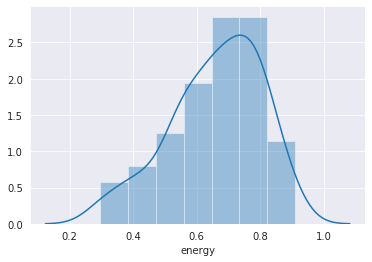

In [36]:
sns.set_style(style='darkgrid')
sns.distplot(df['energy'])

Nous avons donc une énergie moyenne de: 0.6590600000000001.

On peut donc constater que la majorité des chansons ont une énérgie elevée, on peut donc en déduire que les utilisateurs adorent les musiques qui leur permet de danser car plus le taux est elevé plus la musique est énergétique. Nous pouvons donc supposer que le public est assez énergetique. On donc a une idée sur sa tranche d'âge

## Analyse de la durée

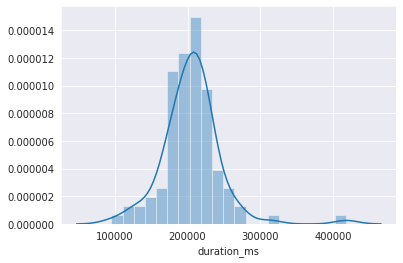

In [37]:
sns.distplot(df['duration_ms'])

Nous avons donc une durée moyenne de: 205206.78.

La valeur moyenne de la durée est de 3 minutes et 25 secondes.
Les gens n'aiment donc pas les chansons trop courtes ou trop longues. 

# Le Tempo

Ci-dessous les 5 caractéristique d'un Tempo
        
        -Allant : au rythme, calme, un peu vif 76 - 108 bpm
        -Lenteur : très lent 20 bpm
        -Allegro : animé et rapide. 110 - 168 bpm
        -Adagio : lent et majestueux 66 - 76 bpm
        -Moderato: Modéré 88-112 bpm
        -Rapide : très rapide 168 - 200 bpm


In [103]:
df['Rhythm']=df['tempo']

df.loc[(df['tempo']>=76) & (df['tempo']<=108),'Rhythm']='Allant'
df.loc[df['tempo']<50,'Rhythm']='lent'
df.loc[(df['tempo']>=110) & (df['tempo']<=168),'Rhythm']='Allegro'
df.loc[(df['tempo']>=66) & (df['tempo']<=76),'Rhythm']='Adagio'
#df.loc[(df['tempo']>=88) & (df['tempo']<=112),'Rhythm']='Moderato'
df.loc[df['tempo']>168,'Rhythm']='Rapide'

In [104]:
df['Rhythm'].value_counts()

Allegro    47
Allant     44
Rapide      7
Adagio      1
64.934      1
Name: Rhythm, dtype: int64

Text(0.5, 1.0, 'Tempo')

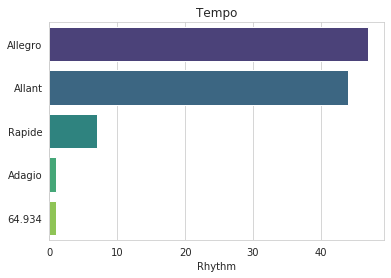

In [105]:
sns.set_style(style='whitegrid')
Rhy=df['Rhythm'].value_counts()
Rhy_DF=pd.DataFrame(Rhy)
sns.barplot(x=Rhy_DF.Rhythm, y=Rhy_DF.index, palette="viridis")
plt.title('Tempo')

# Correspondance

Ici nous utilisons les variables les plus importantes pour voir les correspondances.

In [74]:
Correspondance=df[['danceability','energy','valence','loudness','tempo']]

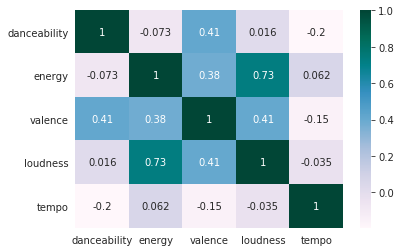

In [75]:
sns.heatmap(Correspondance.corr(),annot=True,cmap="PuBuGn")

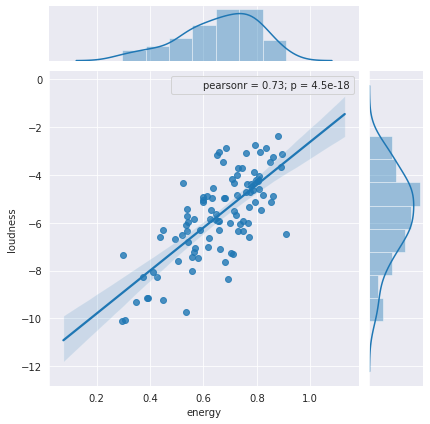

In [76]:
sns.jointplot(data=Correspondance,y='loudness',x='energy',kind='reg',stat_func=pearsonr)

Nous pouvons  observer que comme les valeurs de l'intensité sonore sont proches de zéro.
L'énergie et l'intensité sonore semblent bien corrélées,toute fois l'énergie et la dansabilité correspondent peu, étonnant.

# Les Top selons les caractéristiques

# # Le top 10 des titres avec des vibes positives

In [77]:
df['Rhythm']=df['tempo']

In [78]:
df[['name','artists','energy','valence','tempo','Rhythm']].sort_values(by='valence',ascending=False).head(10)

,name,artists,energy,valence,tempo,Rhythm
25,Shape of You,Ed Sheeran,0.652,0.931,95.977,95.977
46,Finesse (Remix) [feat. Cardi B],Bruno Mars,0.859,0.926,105.115,105.115
89,Bella,Wolfine,0.493,0.844,94.016,94.016
66,D?jala que vuelva (feat. Manuel Turizo),Piso 21,0.788,0.839,170.019,170.019
78,Criminal,Natti Natasha,0.813,0.839,79.997,79.997
41,Dura,Daddy Yankee,0.848,0.828,95.000,95.000
59,Sin Pijama,Becky G,0.745,0.820,94.014,94.014
77,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofia Reyes,0.895,0.794,94.968,94.968
44,Me Niego,Reik,0.779,0.768,94.023,94.023
12,Nice For What,Drake,0.909,0.757,93.394,93.394


## Le top 10 des titres les plus dansants

In [79]:
df[['name','artists','danceability','valence','tempo','Rhythm']].sort_values(by='danceability',ascending=False).head(10)

,name,artists,danceability,valence,tempo,Rhythm
91,Yes Indeed,Lil Baby,0.964,0.562,119.958,119.958
55,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,0.931,0.376,125.978,125.978
19,Look Alive (feat. Drake),BlocBoy JB,0.922,0.595,140.022,140.022
18,Moonlight,XXXTENTACION,0.921,0.711,128.009,128.009
61,Nonstop,Drake,0.912,0.422,154.983,154.983
89,Bella,Wolfine,0.909,0.844,94.016,94.016
73,Walk It Talk It,Migos,0.909,0.406,145.905,145.905
82,HUMBLE.,Kendrick Lamar,0.908,0.421,150.011,150.011
21,Te Bot? - Remix,Nio Garcia,0.903,0.442,96.507,96.507
30,Taste (feat. Offset),Tyga,0.884,0.342,97.994,97.994


# Caractéristiques du meilleur artiste

In [80]:

df['artists'].value_counts().head(4)

XXXTENTACION    6
Post Malone     6
Drake           4
Marshmello      3
Name: artists, dtype: int64

In [81]:
XXXTENT=df[df['artists']=='XXXTENTACION']
XXXTENT[['name','danceability','energy','loudness','valence','tempo','Rhythm']]

,name,danceability,energy,loudness,valence,tempo,Rhythm
1,SAD!,0.740,0.613,-4.880,0.473,75.023,75.023
18,Moonlight,0.921,0.537,-5.723,0.711,128.009,128.009
28,Jocelyn Flores,0.872,0.391,-9.144,0.437,134.021,134.021
38,changes,0.669,0.308,-10.068,0.520,64.934,64.934
62,Fuck Love (feat. Trippie Redd),0.797,0.533,-9.740,0.329,131.036,131.036
94,Everybody Dies In Their Nightmares,0.734,0.570,-7.066,0.689,129.953,129.953


# Conclusion

On peut remarquer la plupart des autres chansons ont beaucoup de similarités, par conséquent, la plupart des auditeurs et ceux qui écoutent les chansons en streaming préfèrent ces goûts musicaux similaires, sauf biensure celles qui n'y sont pas car spéciales ( notamment Yes indeed de Lil Baby, changes de XXXTentaction ou, Lovely de Bilie Elish).
Une forte raison aussi est l'époque de la chanson, la majorité des chansons étaient dans les formes de tempo Allegro et Allant qui caractérise le Hip Hop, la Pop, le Reggae et le rap.